In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re
import random

### Load the video

In [2]:
OPENFACE_DIR = 'openFace/processed_cleansed/'
MEDIAPIPE_DIR = 'mediaPipe/processed_cleansed/'
#OPENFACE_DIR = 'openFace/processed_interpolated/'
#MEDIAPIPE_DIR = 'mediaPipe/processed_interpolated/'
face_mesh = pd.read_csv('faceMesh/face_mesh.csv')

video = 'would_you_rather_29'
print(f'Choosen video: {video}')

Choosen video: would_you_rather_29


## Nose landmarks

Nose landmarks of would_you_rather_29.mp4


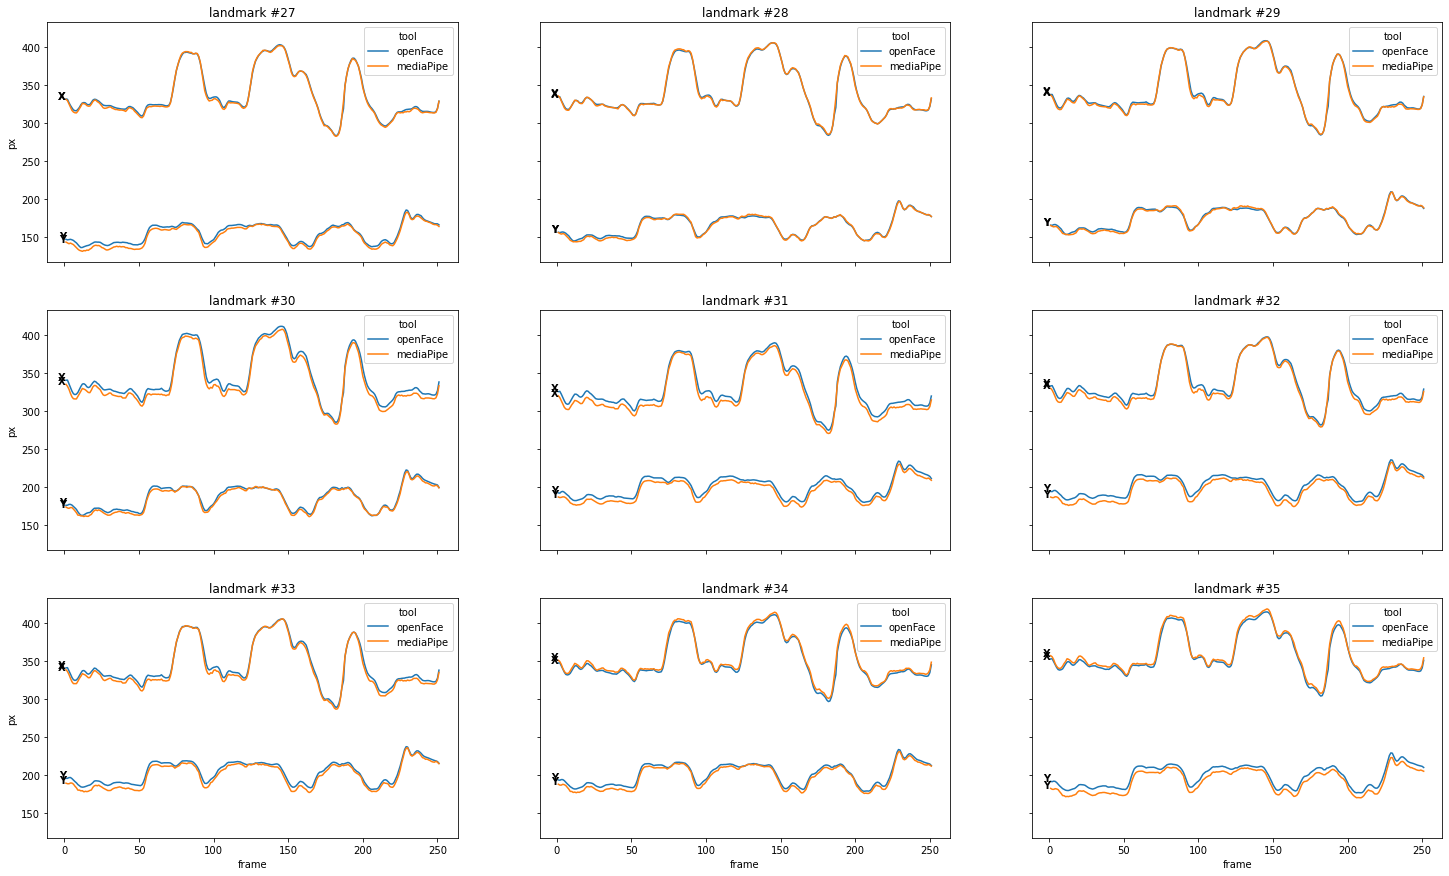

In [3]:
print(f'Nose landmarks of {video}.mp4')

openFace_nose_lndmks = [i for i in range(27, 36)]

fig, axes = plt.subplots(3, 3, figsize=(25, 15), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_nose_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]

    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Mouth landmarks

Mouth landmarks of would_you_rather_29.mp4


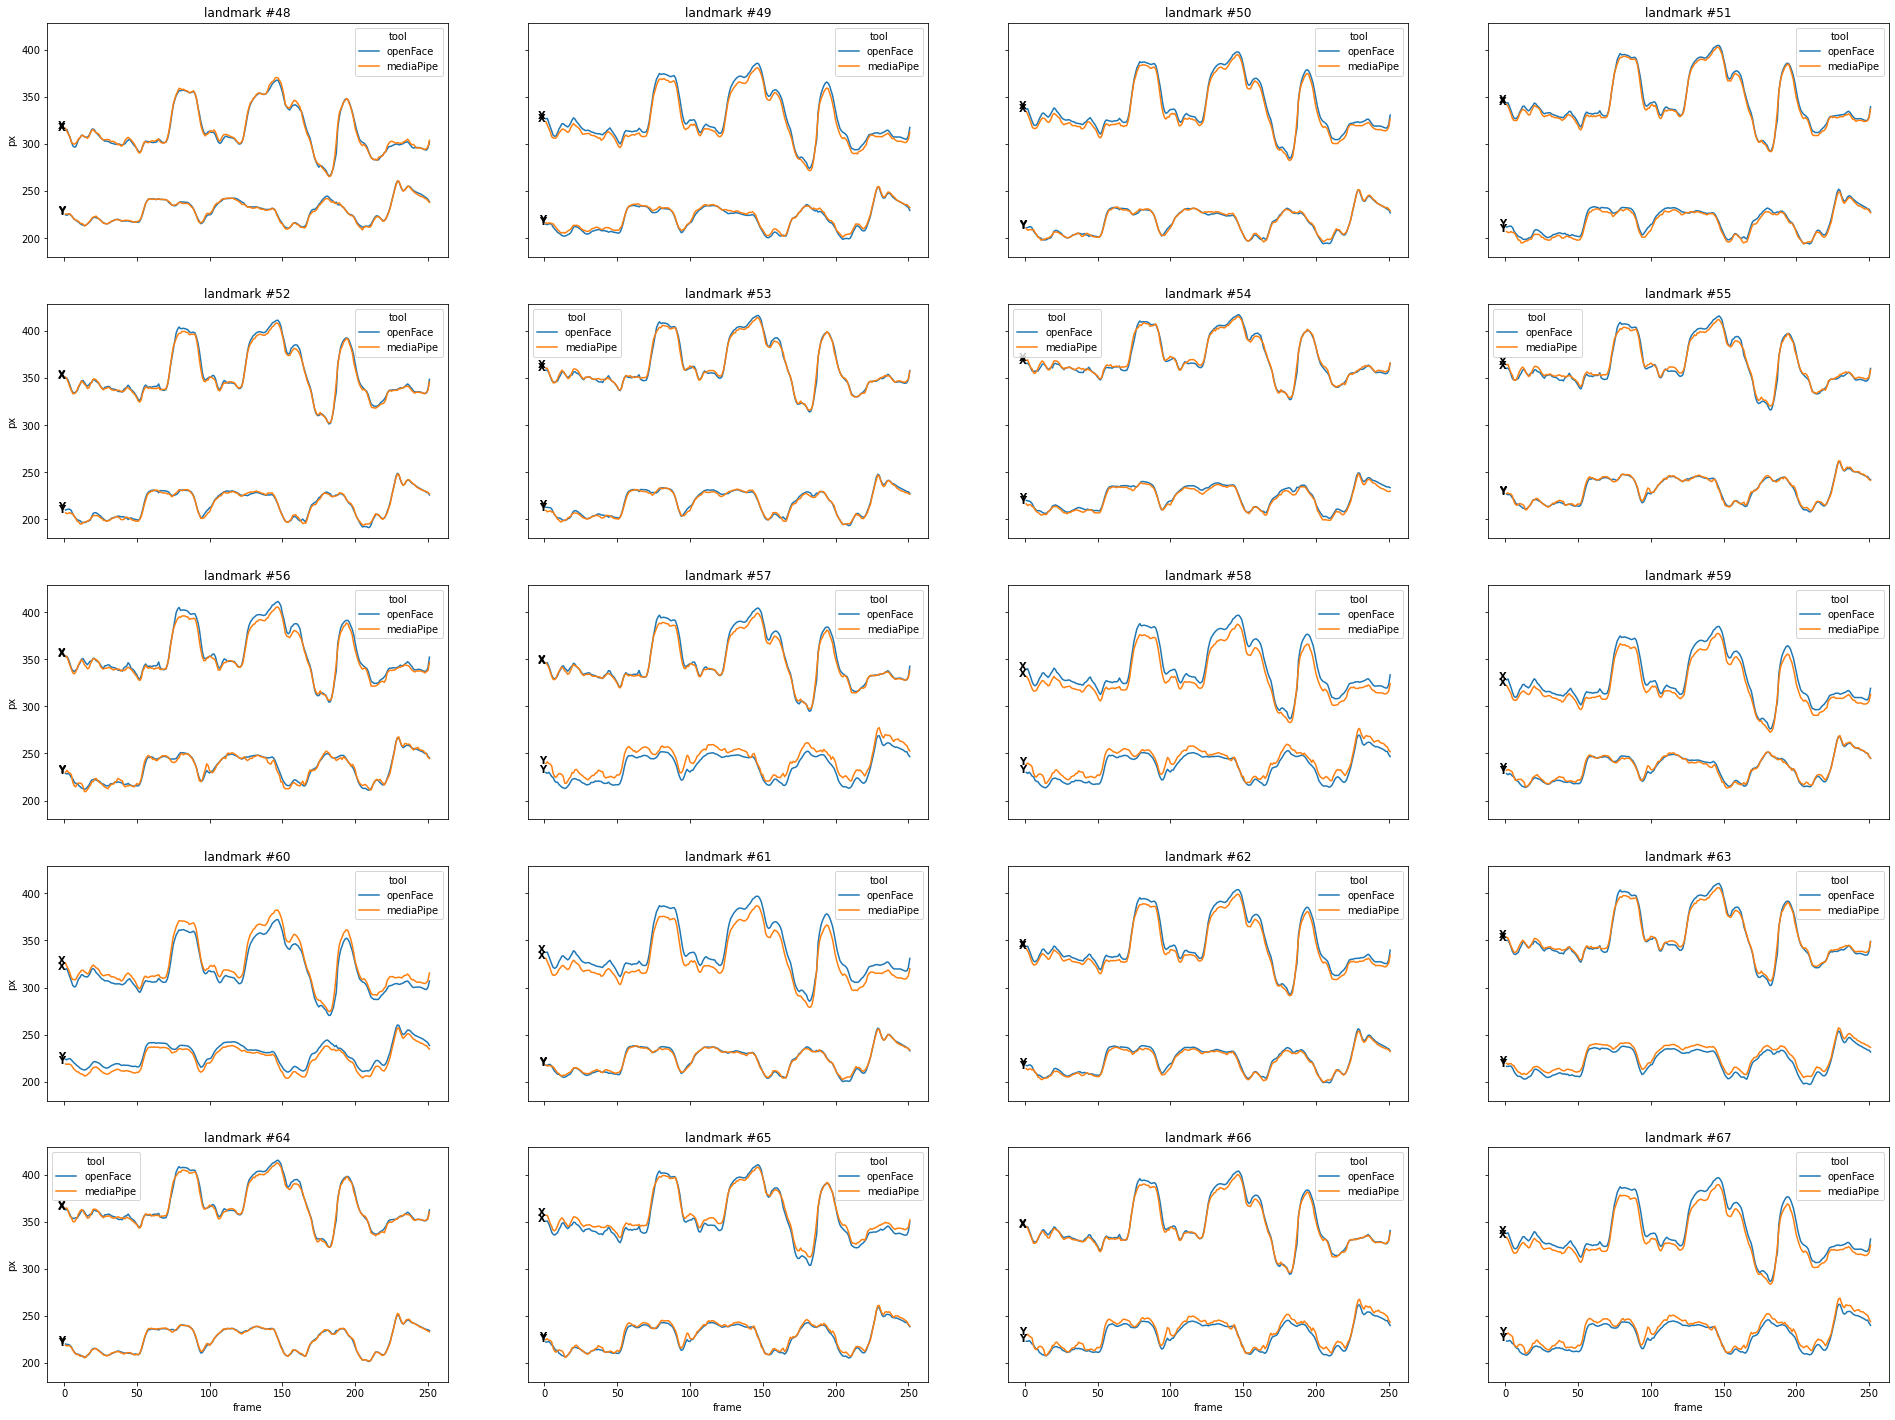

In [4]:
print(f'Mouth landmarks of {video}.mp4')

openFace_mouth_lndmks = [i for i in range(48, 68)]

fig, axes = plt.subplots(5, 4, figsize=(33, 25), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_mouth_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Left eye landamrks

Left eye landmarks of would_you_rather_29.mp4


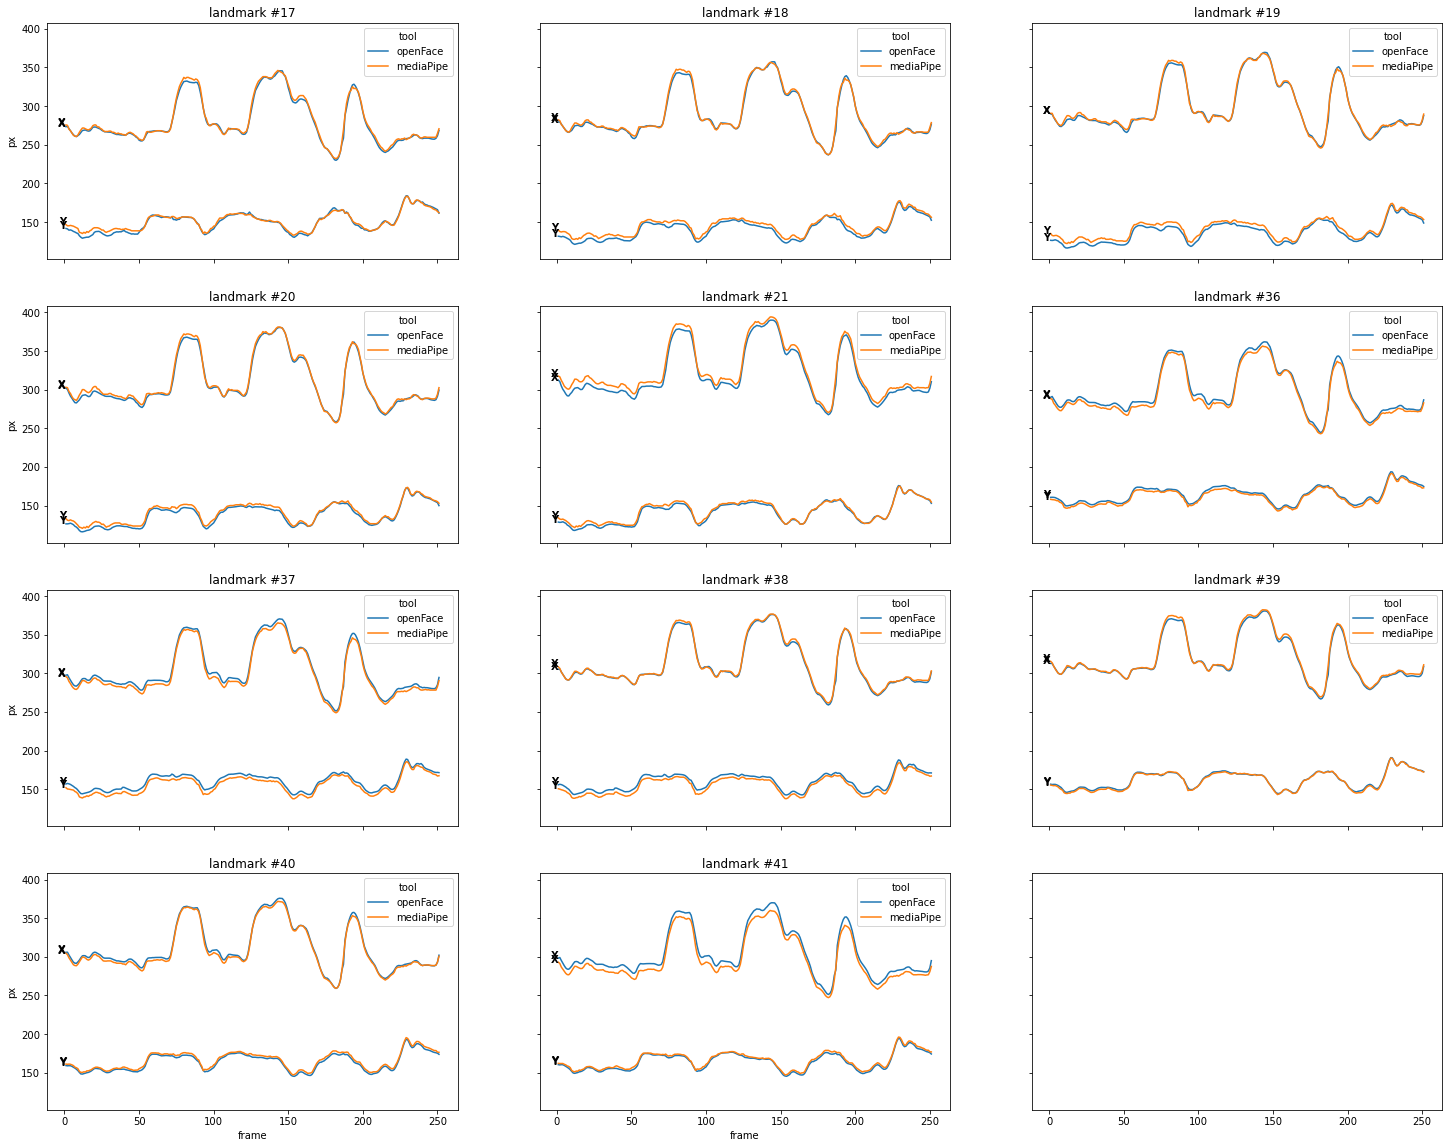

In [5]:
print(f'Left eye landmarks of {video}.mp4')

openFace_leye_lndmks = [i for i in range(17,22)] + [i for i in range(36, 42)]

fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_leye_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Right eye landmarks

Right eye landmarks of would_you_rather_29.mp4


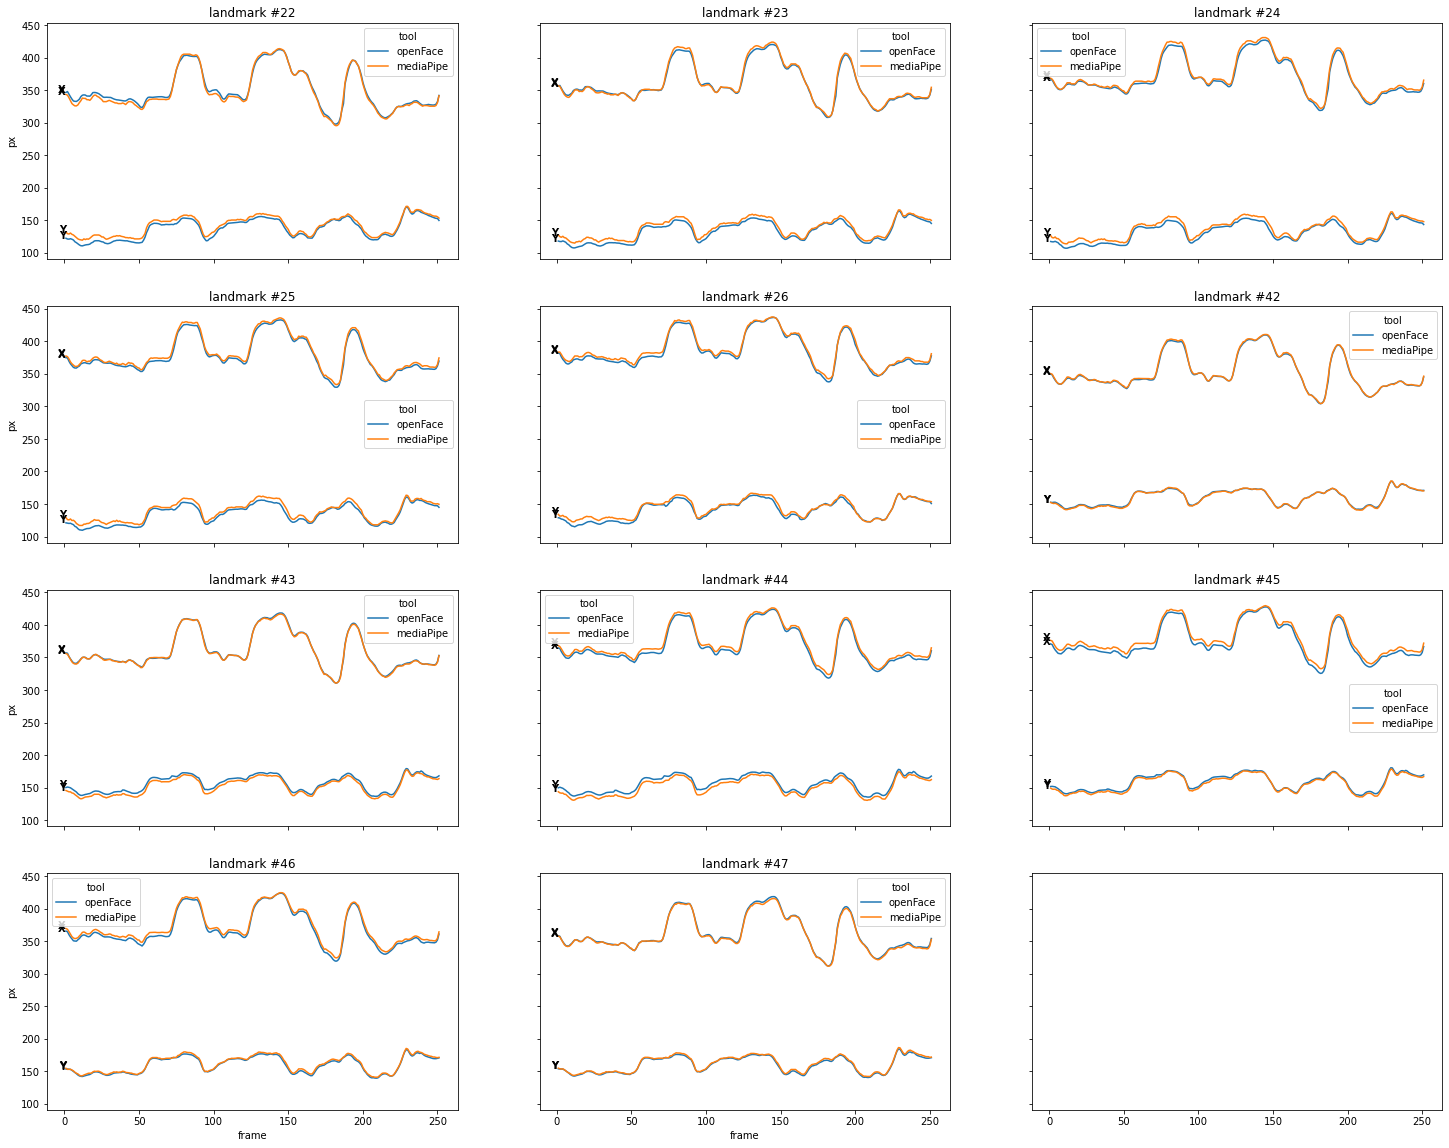

In [6]:
print(f'Right eye landmarks of {video}.mp4')

openFace_reye_lndmks = [i for i in range(22,27)] + [i for i in range(42, 48)]

fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_reye_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Outline landmarks

Outline landmarks of would_you_rather_29.mp4


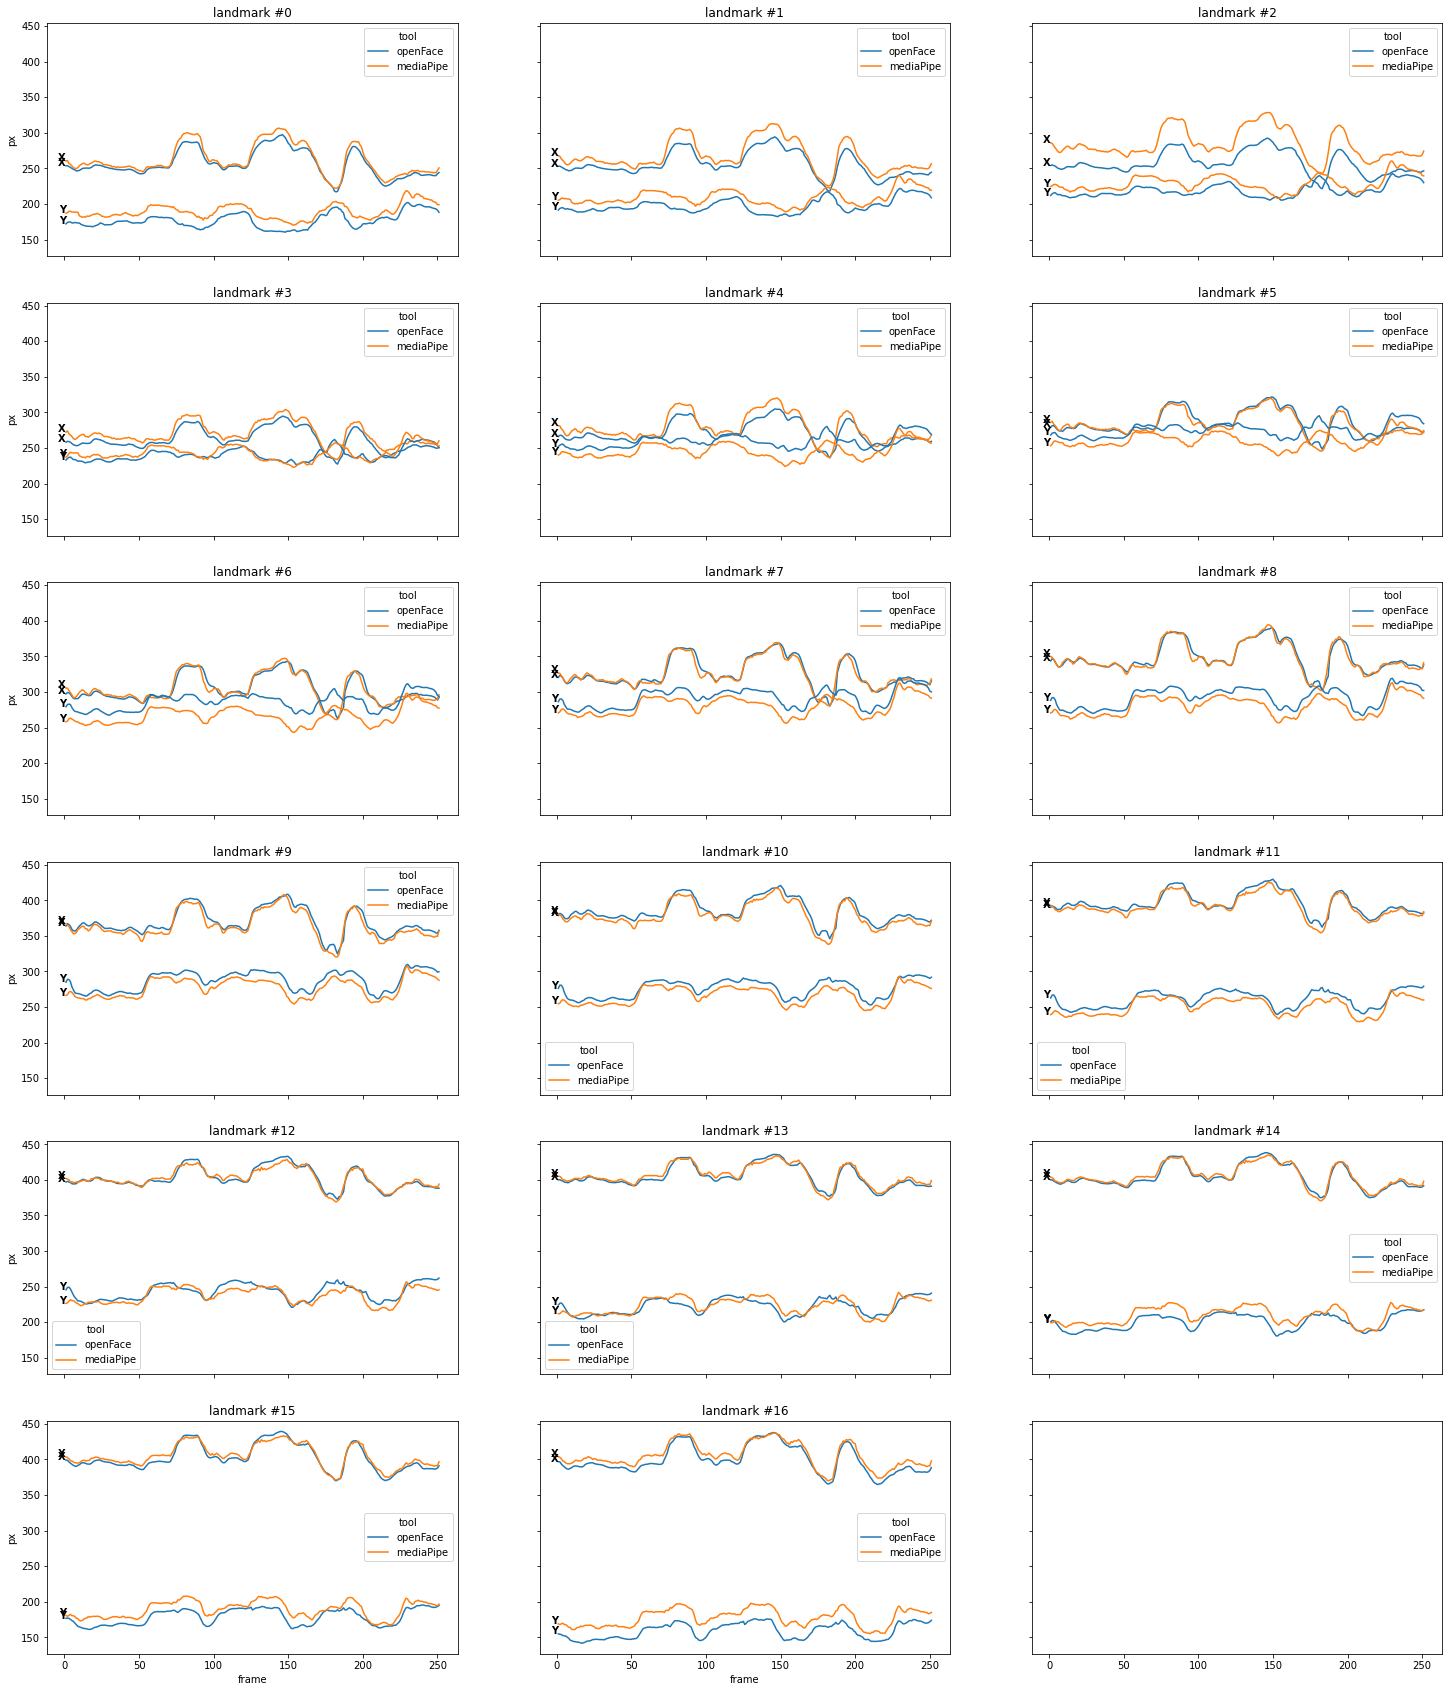

In [7]:
print(f'Outline landmarks of {video}.mp4')

openFace_outline_lndmks = [i for i in range(0,17)]

fig, axes = plt.subplots(6, 3, figsize=(25, 30), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_outline_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

### Creazione dei dataframe con le coordinate

In [8]:
"""
for video in os.listdir('dataset/ElderReact_Data/ElderReact_train/'):

    video_name = video[:-4]
    openface_df = pd.read_csv(f'openFace/processed_cleansed/{video_name}_openface.csv')
    mediapipe_df = pd.read_csv(f'mediaPipe/processed_cleansed/{video_name}_mediapipe.csv')
    
    df = pd.DataFrame({'frame': openface_df.frame})
    for landmark in range(17,68):

        mask = (face_mesh['openFace_landmark'] == landmark)

        mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
        mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

        of_df = pd.read_csv(OPENFACE_DIR + video_name + '_openface.csv')
        of_df = of_df[[f'x_{landmark}', f'y_{landmark}']]
        of_df.columns = [f'openface_x_{landmark}', f'openface_y_{landmark}']

        mp_df = pd.read_csv(MEDIAPIPE_DIR + video_name + '_mediapipe.csv')
        mp_df = pd.DataFrame({f'mediapipe_x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'mediapipe_y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
        
        df = df.join(of_df.join(mp_df))
    
    df.to_csv(f'dataframes/landmarks/{video_name}_landmarks.csv', index=False)
"""

"\nfor video in os.listdir('dataset/ElderReact_Data/ElderReact_train/'):\n\n    video_name = video[:-4]\n    openface_df = pd.read_csv(f'openFace/processed_cleansed/{video_name}_openface.csv')\n    mediapipe_df = pd.read_csv(f'mediaPipe/processed_cleansed/{video_name}_mediapipe.csv')\n    \n    df = pd.DataFrame({'frame': openface_df.frame})\n    for landmark in range(17,68):\n\n        mask = (face_mesh['openFace_landmark'] == landmark)\n\n        mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]\n        mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]\n\n        of_df = pd.read_csv(OPENFACE_DIR + video_name + '_openface.csv')\n        of_df = of_df[[f'x_{landmark}', f'y_{landmark}']]\n        of_df.columns = [f'openface_x_{landmark}', f'openface_y_{landmark}']\n\n        mp_df = pd.read_csv(MEDIAPIPE_DIR + video_name + '_mediapipe.csv')\n        mp_df = pd.DataFrame({f'mediapipe_x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'mediapipe